<a href="https://colab.research.google.com/github/bing020815/mathematics/blob/master/regression/Multicollinearity_in_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In statistics, `multicollinearity` (also `collinearity`) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. -- *Wiki*

When independent variables in the regression model are highly correlated to each other, the `multicollinearity` usually happens. And, it could be hard for interpretation of model and may face overfitting problem. 

For example, a monthly sales record for this year might be choosen to build a regression model. However, the way we choose to monthly sales record as independent variables could lead the wrong conclusion. Let's say we have quartly sales record for 2020 and monthly sales records 2020 as our independent variables. And we will see that these features are highly correlated with each other. Because Q1 sales record consist of Jan, Feb and March records and vice versa. 

### What is the problem of Multi-Collinearity?
When independent variables are highly correlated, any change of a variable will cause a chain rule effect on one variable to another variable. The model, then, will have misleading results for incorrect conclusion. 

1. It would be hard to identify significant variables for the model 
2. Coefficient Estimates would not be stable and it would be hard to interpret the model
3. The unstable nature of the model may cause overfitting. When out of sample data applies, the accuracy will drop significantly

PS: Depending on the situation, it may not be a problem for model has slightly or moderately collinearity issue. However, it is strongly advised to solve the issue if severe collinearity issue exists(e.g. correlation > 0.8 between 2 variables or Variance inflation factor(VIF) >20 )


There are two method to check if Multi-Collinearity occurs:
1. Eyeball on the correlation matrix
2. Variance Inglation Factor (VIF)

### 1. Correlation Matrix

In [1]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [2]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
import pandas as pd
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df['MEDV'] = boston_dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


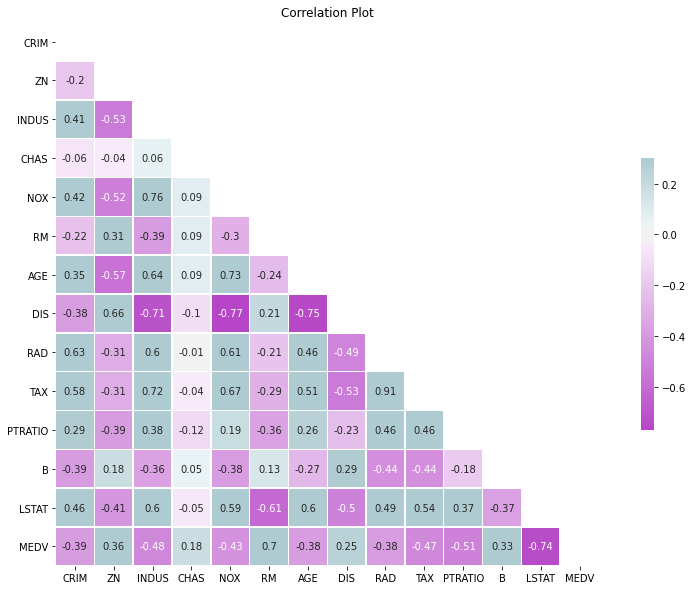

In [5]:
# plot color scaled correlation matrix
corr = df.corr().round(2)

# Draw the heatmap with the mask and correct aspect ratio
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,10))

## Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

## Generate a custom diverging colormap
cmap = sns.diverging_palette(300, 210, as_cmap=True)

## annot = True to print the values inside the square
hm=sns.heatmap(data=corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Plot')
plt.show();

Heatmap helps on selecting variables to include in a regression model by looking at the correlation matrix and select the independent variables with high correlation with dependent variable.

Usually, we will check if a pair of `independent variables` to see if its correlation exceed `0.8`.

## Variance Inflation Factor (VIF)
Use Variance Inflation Factor(VIF) for each independent variable. VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.  

VIF formula: 
\begin{equation}
VIF = \frac{1}{1-R^2}
  \end{equation}

$R^2$ value is determined to find out how well an independent variable is described by the other independent variables (a regression that does not involve the response variable Y). A high value of $R^2$ means that the variable is highly correlated with the other variables.

So, the closer the $R^2$ value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.



In [6]:
# Compute VIF data for each independent variable

def calc_vif(X):
    """
    expect: X is a dataframe
    modify: calculate the VIF values
    return: return a dataframe
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    import pandas as pd
    # Calculating VIF
    vif = pd.DataFrame()
    vif["features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [7]:
X = df.iloc[:,:-1]
calc_vif(X)

,features,VIF
0,CRIM,2.100373
1,ZN,2.844013
2,INDUS,14.485758
3,CHAS,1.152952
4,NOX,73.894947
5,RM,77.948283
6,AGE,21.386850
7,DIS,14.699652
8,RAD,15.167725
9,TAX,61.227274


If VIF value is higher than `10`, it is usually considered having high correlation with other independent variables, meaning it can be predicted by other independent variables in the dataset.

PS: Although `correlation matrix` and `scatter plots` can also be used to find multicollinearity, their findings only show the **bivariate relationship between the independent variables**. VIF is preferred as it can show the **correlation of a variable with a group of other variables**.

## How to fix Multi-Collinearity issue?
1. Variable Selection
2. Variable Transformation
3. Principal Component Analysis

### Variable Selection
Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features

In [8]:
X = df.drop(['NOX','RM','PTRATIO','TAX','MEDV'],axis=1)
calc_vif(X)

,features,VIF
0,CRIM,2.095367
1,ZN,2.334763
2,INDUS,9.016142
3,CHAS,1.116229
4,AGE,14.000758
5,DIS,8.447694
6,RAD,4.771767
7,B,13.537020
8,LSTAT,8.358925


By removing the 'NOX','RM','PTRATIO','TAX' columns, the VIF has been decreased.

## Variable Transformation
Transfromation can be done by combining two independents variables.

In [9]:
df2 = df.copy()
df2['INDUS_at_B_and_AGE'] = df.apply(lambda x: x['B'] - x['INDUS'] - x['AGE'],axis=1)
X = df2.drop(['INDUS','B','AGE', 'NOX','RM','PTRATIO','TAX','MEDV'],axis=1)
calc_vif(X)

,features,VIF
0,CRIM,2.083954
1,ZN,2.263873
2,CHAS,1.086126
3,DIS,8.207575
4,RAD,3.757866
5,LSTAT,4.602401
6,INDUS_at_B_and_AGE,7.083500


Here we can see the numbers has been decresed below 10 by having variable transformation.

### Principal Component Analysis
Principal Component Analysis(PCA) is commonly used to reduce the dimension of data by decomposing data into the number of independent factors. It has many applications like simplifying model calculation by reducing the number of predicting factors. Here, we use the character of variable independency for PCA to remove multi-collinearity issue in the model.

In [10]:
#Create the new data frame by transforming data using PCA
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
components=pca.fit_transform(X)
componentsDf=pd.DataFrame(data=components,columns=['component 1','component 2','component 3','component 4','component 5','component 6','component 7'])
print(componentsDf)
#Calculate VIF for each variable in the new data frame
X = componentsDf
calc_vif(X)

     component 1  component 2  ...  component 6  component 7
0     -53.445128     3.473428  ...    -0.803652    -0.100734
1     -33.515130   -13.164395  ...     1.117063    -0.054929
2     -47.350198   -13.865980  ...     0.920758    -0.074221
3     -69.227443   -15.620510  ...     1.955364    -0.051563
4     -63.045406   -15.317811  ...     2.046793    -0.042474
..           ...          ...  ...          ...          ...
501   -33.545110   -13.279538  ...    -1.389770    -0.117042
502   -30.888674   -13.011081  ...    -1.590357    -0.123976
503   -16.782641   -11.514703  ...    -1.771067    -0.138481
504   -15.013089   -11.431990  ...    -1.518889    -0.129497
505   -26.854324   -12.550401  ...    -1.397484    -0.122386

[506 rows x 7 columns]


,features,VIF
0,component 1,1.0
1,component 2,1.0
2,component 3,1.0
3,component 4,1.0
4,component 5,1.0
5,component 6,1.0
6,component 7,1.0


The PCA analysis seems to work very well on solving multi-collineartiy issue but model interpretation will be lost. And, when out of sample data is used to for predicting, the PCA transformation needs to be implemented again. Thus, we should try our best to reduce the correlation by selecting the right variables and transform them if needed.  

Multicollinearity may not be a problem every time. The need to fix multicollinearity depends primarily on the below reasons:

1. When you care more about how much each individual feature rather than a group of features affects the target variable, then removing multicollinearity may be a good option
2. If multicollinearity is not present in the features you are interested in, then multicollinearity may not be a problem.